In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('Data/Full Data/scores.csv')

C:\Users\david\AppData\Local\Temp\ipykernel_20804\188938750.py:1: DtypeWarning: Columns (32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/Full Data/scores.csv')


In [17]:
students = df['student_id'].sample(n = 10, random_state = 63).values

In [18]:
first_att = df[df['attempt'] == 1]

In [19]:
first_att.columns

Index(['book', 'release', 'chapter', 'page', 'chapter_number',
       'section_number', 'review_flag', 'institution_id', 'class_id',
       'student_id', 'item_id', 'item_type', 'response', 'prompt',
       'points_possible', 'points_earned', 'dt_submitted', 'completes_page',
       'attempt', 'user_agent', 'lrn_response_id', 'lrn_activity_reference',
       'lrn_question_reference', 'lrn_question_position', 'lrn_type',
       'lrn_dt_started', 'lrn_dt_saved', 'lrn_status', 'lrn_option_0',
       'lrn_option_1', 'lrn_option_2', 'lrn_option_3', 'lrn_option_4',
       'lrn_option_5', 'lrn_option_6', 'lrn_option_7', 'lrn_option_8',
       'lrn_option_9', 'lrn_option_10', 'lrn_option_11', 'chapter_topic',
       'page_topic'],
      dtype='object')

In [20]:
df[df['student_id'] == students[0]].shape

(789, 42)

In [21]:
df[df['student_id'] == students[1]]['book'].unique()

array(['College / Advanced Statistics and Data Science (ABCD)',
       'College / Statistics and Data Science (ABC)'], dtype=object)

In [22]:
df[df['student_id'] == students[2]]['book'].unique()

array(['College / Advanced Statistics and Data Science (ABCD)',
       'College / Statistics and Data Science (ABC)'], dtype=object)

In [23]:
first_scs = df[df['points_possible'] == df['points_earned']]

In [24]:
def evaluate_student_by_attempts_til_correct(df, student_id):
    stud = df[df["student_id"] == student_id]

    stud["correct"] = (stud["points_earned"] == stud["points_possible"])
    correct_questions = stud[stud["correct"]]
    correct_questions = correct_questions[["chapter", "page_topic", "item_id", "prompt", "attempt"]]

    min_attempts = correct_questions.groupby(["item_id", "prompt", "page_topic"])["attempt"].min()
    
    average_attempts_by_topic = min_attempts.reset_index()
    
    # ["attempt"].mean()
    
    return average_attempts_by_topic

In [61]:
df[(df['student_id'] == 'f9f75dc7-9293-4588-aef1-c6dae84bee01') & (df['page_topic'] == 'Randomness')]

,book,release,chapter,page,chapter_number,section_number,review_flag,institution_id,class_id,student_id,...,lrn_option_4,lrn_option_5,lrn_option_6,lrn_option_7,lrn_option_8,lrn_option_9,lrn_option_10,lrn_option_11,chapter_topic,page_topic
335576,College / Advanced Statistics and Data Science...,v5.0,Chapter 4 - Explaining Variation,4.8 Randomness,4.0,8.0,False,2f830a93-5a14-4aff-a6e8-c7d2562e2007,312e145c-f6b8-4f25-a73e-4d9f5b5926c0,f9f75dc7-9293-4588-aef1-c6dae84bee01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explaining Variation,Randomness
335826,College / Advanced Statistics and Data Science...,v5.0,Chapter 4 - Explaining Variation,4.8 Randomness,4.0,8.0,False,2f830a93-5a14-4aff-a6e8-c7d2562e2007,312e145c-f6b8-4f25-a73e-4d9f5b5926c0,f9f75dc7-9293-4588-aef1-c6dae84bee01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explaining Variation,Randomness
335935,College / Advanced Statistics and Data Science...,v5.0,Chapter 4 - Explaining Variation,4.8 Randomness,4.0,8.0,False,2f830a93-5a14-4aff-a6e8-c7d2562e2007,312e145c-f6b8-4f25-a73e-4d9f5b5926c0,f9f75dc7-9293-4588-aef1-c6dae84bee01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explaining Variation,Randomness
336084,College / Advanced Statistics and Data Science...,v5.0,Chapter 4 - Explaining Variation,4.8 Randomness,4.0,8.0,False,2f830a93-5a14-4aff-a6e8-c7d2562e2007,312e145c-f6b8-4f25-a73e-4d9f5b5926c0,f9f75dc7-9293-4588-aef1-c6dae84bee01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explaining Variation,Randomness
336349,College / Advanced Statistics and Data Science...,v5.0,Chapter 4 - Explaining Variation,4.8 Randomness,4.0,8.0,False,2f830a93-5a14-4aff-a6e8-c7d2562e2007,312e145c-f6b8-4f25-a73e-4d9f5b5926c0,f9f75dc7-9293-4588-aef1-c6dae84bee01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explaining Variation,Randomness
336577,College / Advanced Statistics and Data Science...,v5.0,Chapter 4 - Explaining Variation,4.8 Randomness,4.0,8.0,False,2f830a93-5a14-4aff-a6e8-c7d2562e2007,312e145c-f6b8-4f25-a73e-4d9f5b5926c0,f9f75dc7-9293-4588-aef1-c6dae84bee01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explaining Variation,Randomness
336633,College / Advanced Statistics and Data Science...,v5.0,Chapter 4 - Explaining Variation,4.8 Randomness,4.0,8.0,False,2f830a93-5a14-4aff-a6e8-c7d2562e2007,312e145c-f6b8-4f25-a73e-4d9f5b5926c0,f9f75dc7-9293-4588-aef1-c6dae84bee01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explaining Variation,Randomness
336845,College / Advanced Statistics and Data Science...,v5.0,Chapter 4 - Explaining Variation,4.8 Randomness,4.0,8.0,False,2f830a93-5a14-4aff-a6e8-c7d2562e2007,312e145c-f6b8-4f25-a73e-4d9f5b5926c0,f9f75dc7-9293-4588-aef1-c6dae84bee01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explaining Variation,Randomness


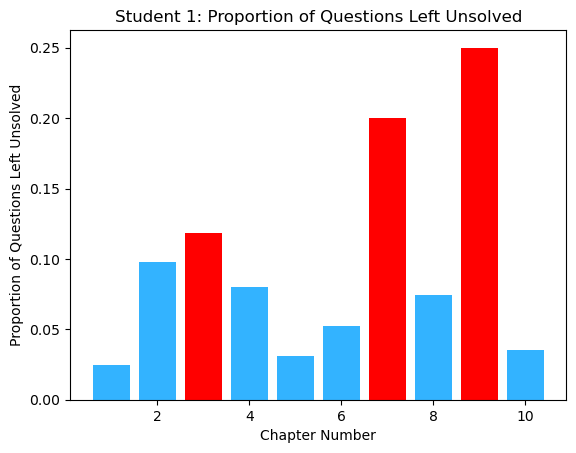

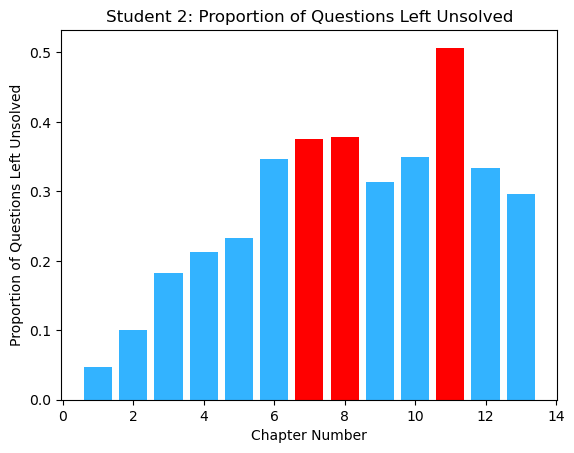

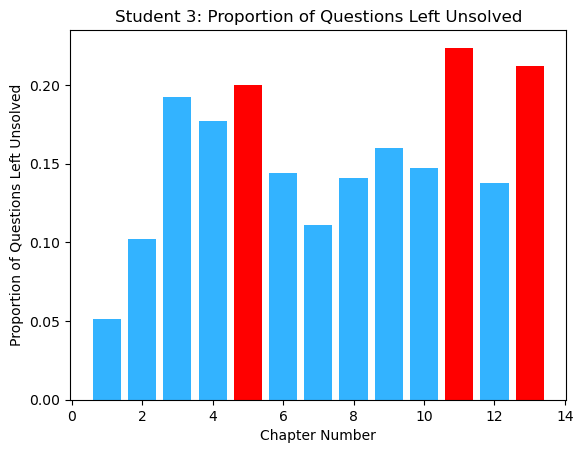

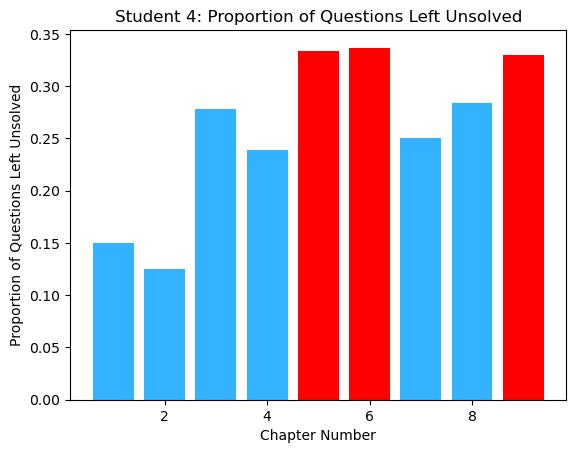

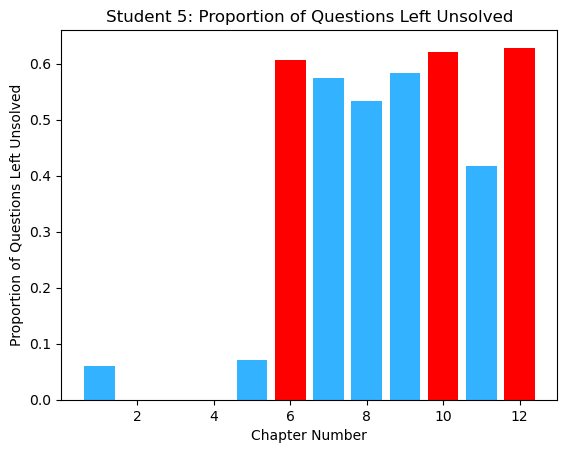

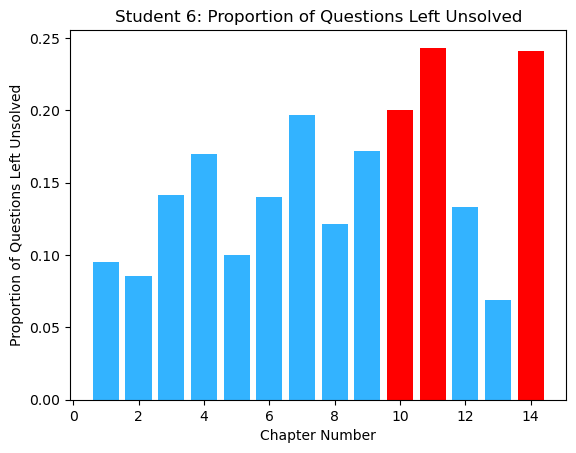

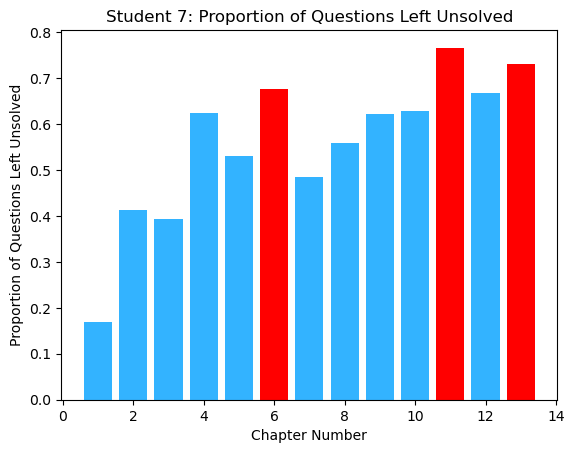

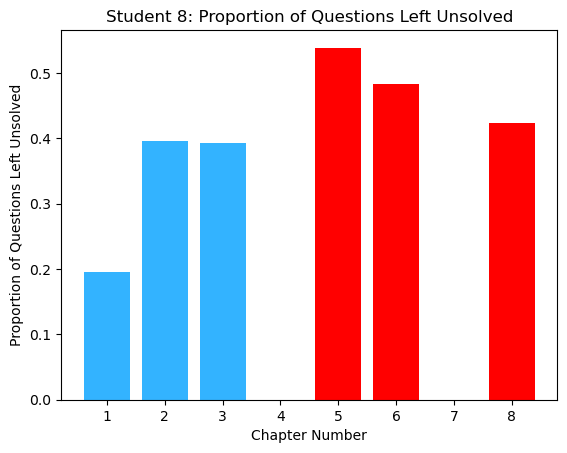

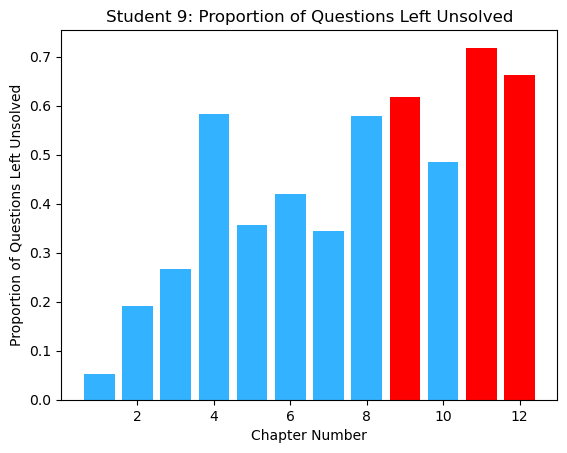

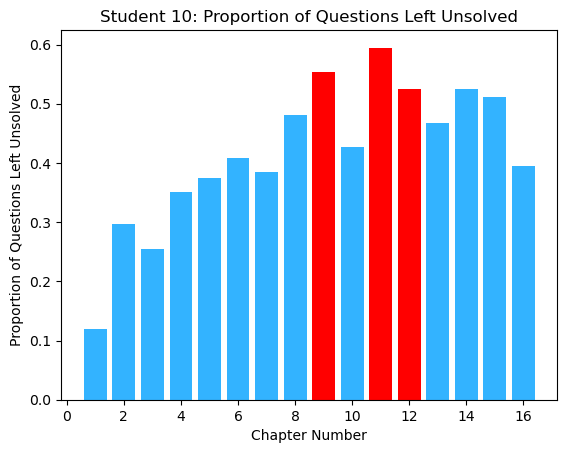

In [25]:
for i, student in enumerate(students):
    student_data = df[df['student_id'] == student]
    max_attempts = student_data.groupby('prompt')['attempt'].max().reset_index()
    max_attempts.rename(columns={'attempt': 'Max_Attempts'}, inplace=True)
    student_data = pd.merge(student_data, max_attempts, on = 'prompt', how = "left")
    student_data['unanswered'] = ((student_data['Max_Attempts'] == student_data['attempt']) & 
                (student_data['points_earned'] != student_data['points_possible'])).astype(int)
    
    chapter_prop = student_data.groupby('chapter')['unanswered'].mean().sort_values(ascending=False)
    
    chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_prop.index]
    chapter_prop.index = chapter_num
    chapter_prop.sort_index(inplace = True)
    
    thresh = chapter_prop.sort_values(ascending = False).values[2]
    
    colors = ['#33B3FF' if value < thresh else 'red' for value in chapter_prop]
    
    plt.bar(chapter_prop.index, chapter_prop.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Proportion of Questions Left Unsolved')
    plt.title(f"Student {i + 1}: Proportion of Questions Left Unsolved")
    plt.show()

In [29]:
students[9]

'f9f75dc7-9293-4588-aef1-c6dae84bee01'

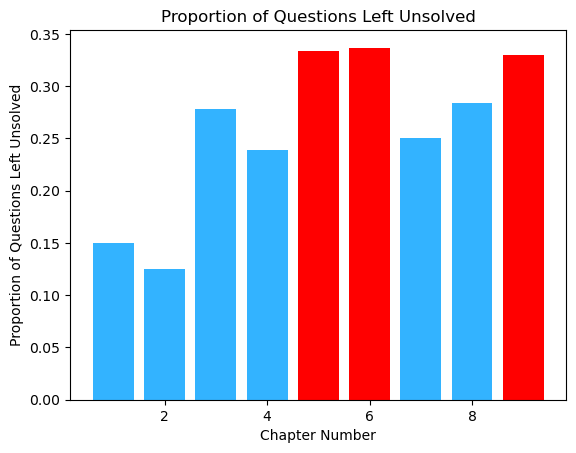

In [34]:
student_data = df[df['student_id'] == 'e785ea7f-c08e-425f-82ae-2257adf89534']
max_attempts = student_data.groupby('prompt')['attempt'].max().reset_index()
max_attempts.rename(columns={'attempt': 'Max_Attempts'}, inplace=True)
student_data = pd.merge(student_data, max_attempts, on = 'prompt', how = "left")
student_data['unanswered'] = ((student_data['Max_Attempts'] == student_data['attempt']) & 
            (student_data['points_earned'] != student_data['points_possible'])).astype(int)

chapter_prop = student_data.groupby('chapter')['unanswered'].mean().sort_values(ascending=False)

chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_prop.index]
chapter_prop.index = chapter_num
chapter_prop.sort_index(inplace = True)

thresh = chapter_prop.sort_values(ascending = False).values[2]

colors = ['#33B3FF' if value < thresh else 'red' for value in chapter_prop]

plt.bar(chapter_prop.index, chapter_prop.values, color = colors)
plt.xlabel('Chapter Number')
plt.ylabel('Proportion of Questions Left Unsolved')
plt.title("Proportion of Questions Left Unsolved")
plt.show()

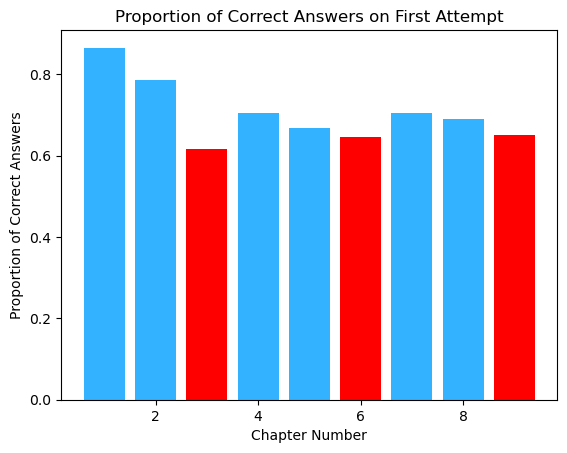

In [35]:
chapters = first_att[first_att['student_id'] == 'e785ea7f-c08e-425f-82ae-2257adf89534'].groupby('chapter')
chapter_scores = chapters['points_earned'].sum() / chapters['points_possible'].sum()
chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_scores.index]
chapter_scores.index = chapter_num
chapter_scores.sort_index(inplace = True)

thresh = chapter_scores.sort_values().values[2]

colors = ['#33B3FF' if value > thresh else 'red' for value in chapter_scores]

plt.bar(chapter_scores.index, chapter_scores.values, color = colors)
plt.xlabel('Chapter Number')
plt.ylabel('Proportion of Correct Answers')
plt.title("Proportion of Correct Answers on First Attempt")
plt.show()

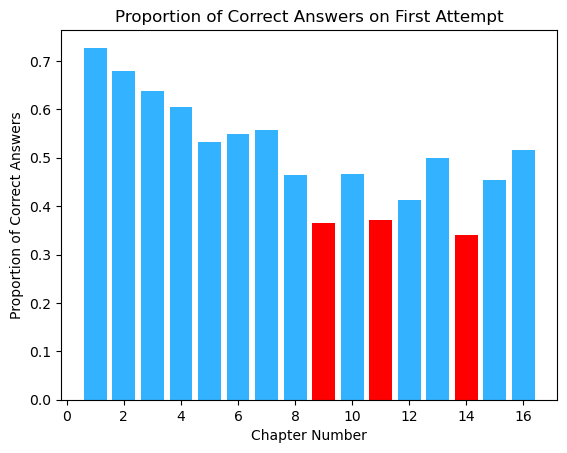

In [58]:
chapters = first_att[first_att['student_id'] == 'f9f75dc7-9293-4588-aef1-c6dae84bee01'].groupby('chapter')
chapter_scores = chapters['points_earned'].sum() / chapters['points_possible'].sum()
chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_scores.index]
chapter_scores.index = chapter_num
chapter_scores.sort_index(inplace = True)

thresh = chapter_scores.sort_values().values[2]

colors = ['#33B3FF' if value > thresh else 'red' for value in chapter_scores]

plt.bar(chapter_scores.index, chapter_scores.values, color = colors)
plt.xlabel('Chapter Number')
plt.ylabel('Proportion of Correct Answers')
plt.title("Proportion of Correct Answers on First Attempt")
plt.show()

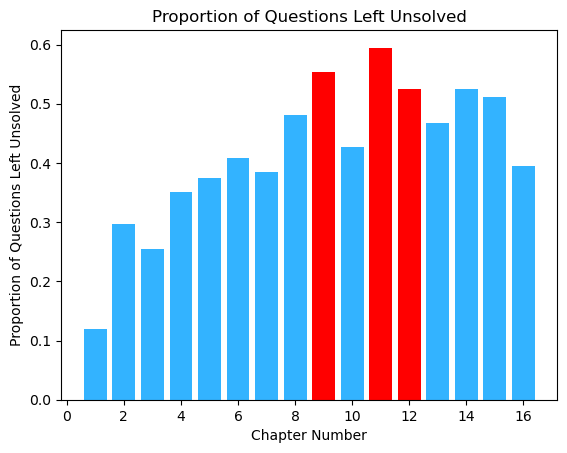

In [59]:
student_data = df[df['student_id'] == 'f9f75dc7-9293-4588-aef1-c6dae84bee01']
max_attempts = student_data.groupby('prompt')['attempt'].max().reset_index()
max_attempts.rename(columns={'attempt': 'Max_Attempts'}, inplace=True)
student_data = pd.merge(student_data, max_attempts, on = 'prompt', how = "left")
student_data['unanswered'] = ((student_data['Max_Attempts'] == student_data['attempt']) & 
            (student_data['points_earned'] != student_data['points_possible'])).astype(int)

chapter_prop = student_data.groupby('chapter')['unanswered'].mean().sort_values(ascending=False)

chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_prop.index]
chapter_prop.index = chapter_num
chapter_prop.sort_index(inplace = True)

thresh = chapter_prop.sort_values(ascending = False).values[2]

colors = ['#33B3FF' if value < thresh else 'red' for value in chapter_prop]

plt.bar(chapter_prop.index, chapter_prop.values, color = colors)
plt.xlabel('Chapter Number')
plt.ylabel('Proportion of Questions Left Unsolved')
plt.title("Proportion of Questions Left Unsolved")
plt.show()

In [38]:
students[9]

'f9f75dc7-9293-4588-aef1-c6dae84bee01'

In [39]:
df.columns

Index(['book', 'release', 'chapter', 'page', 'chapter_number',
       'section_number', 'review_flag', 'institution_id', 'class_id',
       'student_id', 'item_id', 'item_type', 'response', 'prompt',
       'points_possible', 'points_earned', 'dt_submitted', 'completes_page',
       'attempt', 'user_agent', 'lrn_response_id', 'lrn_activity_reference',
       'lrn_question_reference', 'lrn_question_position', 'lrn_type',
       'lrn_dt_started', 'lrn_dt_saved', 'lrn_status', 'lrn_option_0',
       'lrn_option_1', 'lrn_option_2', 'lrn_option_3', 'lrn_option_4',
       'lrn_option_5', 'lrn_option_6', 'lrn_option_7', 'lrn_option_8',
       'lrn_option_9', 'lrn_option_10', 'lrn_option_11', 'chapter_topic',
       'page_topic'],
      dtype='object')

In [41]:
df[(df['student_id'] == students[9]) & (df['page_topic'].isin(['Models with Multiple Categorical Predictors', 'Randomness', 'Sums of Squares for Targeted Model Comparisons']))]['chapter_number'].value_counts()

14.0    18
4.0      8
Name: chapter_number, dtype: int64

In [54]:
import matplotlib.patches as mpatches

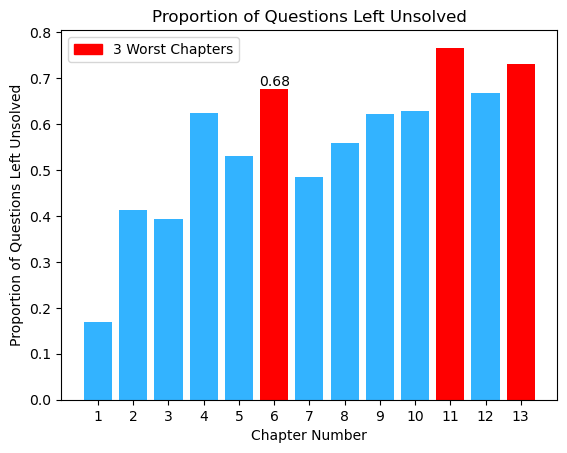

In [66]:
student_data = df[df['student_id'] == students[6]]
max_attempts = student_data.groupby('prompt')['attempt'].max().reset_index()
max_attempts.rename(columns={'attempt': 'Max_Attempts'}, inplace=True)
student_data = pd.merge(student_data, max_attempts, on = 'prompt', how = "left")
student_data['unanswered'] = ((student_data['Max_Attempts'] == student_data['attempt']) & 
            (student_data['points_earned'] != student_data['points_possible'])).astype(int)

chapter_prop = student_data.groupby('chapter')['unanswered'].mean().sort_values(ascending=False)

chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_prop.index]
chapter_prop.index = chapter_num
chapter_prop.sort_index(inplace = True)

thresh = chapter_prop.sort_values(ascending = False).values[2]
colors = ['#33B3FF' if value < thresh else 'red' for value in chapter_prop]

bars = plt.bar(chapter_prop.index, chapter_prop.values, color = colors)
x_coordinate = bars[5].get_x() + bars[5].get_width() / 2
y_coordinate = bars[5].get_height()
label_text = str(round(chapter_prop[6], ndigits = 2))
plt.text(x_coordinate, y_coordinate, label_text, ha='center', va='bottom')

plt.legend(handles = [mpatches.Patch(color = 'red', label = '3 Worst Chapters')])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.xlabel('Chapter Number')
plt.ylabel('Proportion of Questions Left Unsolved')
plt.title("Proportion of Questions Left Unsolved")
plt.show()

In [57]:
students[6]

'82002781-ff80-43ce-82a1-84f135f8387c'

In [69]:
df['chapter'].unique()

array(['Chapter 1 - Welcome to Statistics: A Modeling Approach',
       'Chapter 10 - The Logic of Inference',
       'Chapter 11 - Model Comparison with F',
       'Chapter 12 - Parameter Estimation and Confidence Intervals',
       'Chapter 13 - Introduction to Multivariate Models',
       'Chapter 14 - Multivariate Model Comparisons',
       'Chapter 2 - Understanding Data',
       'Chapter 3 - Examining Distributions',
       'Chapter 4 - Explaining Variation', 'Chapter 5 - A Simple Model',
       'Chapter 6 - Quantifying Error',
       'Chapter 7 - Adding an Explanatory Variable to the Model',
       'Chapter 8 - Digging Deeper into Group Models',
       'Chapter 9 - Models with a Quantitative Explanatory Variable',
       'Chapter 15 - Models with Interactions',
       'Chapter 16 - More Models with Interactions',
       'Chapter 13 - What You Have Learned'], dtype=object)

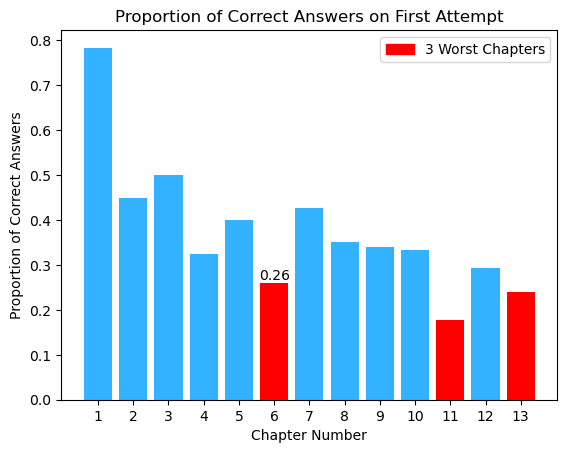

In [65]:
chapters = first_att[first_att['student_id'] == students[6]].groupby('chapter')
chapter_scores = chapters['points_earned'].sum() / chapters['points_possible'].sum()
chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_scores.index]
chapter_scores.index = chapter_num
chapter_scores.sort_index(inplace = True)

thresh = chapter_scores.sort_values().values[2]
colors = ['#33B3FF' if value > thresh else 'red' for value in chapter_scores]


bars = plt.bar(chapter_scores.index, chapter_scores.values, color = colors)
x_coordinate = bars[5].get_x() + bars[5].get_width() / 2
y_coordinate = bars[5].get_height()
label_text = str(round(chapter_scores[6], ndigits = 2))
plt.text(x_coordinate, y_coordinate, label_text, ha='center', va='bottom')

plt.legend(handles = [mpatches.Patch(color = 'red', label = '3 Worst Chapters')])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.xlabel('Chapter Number')
plt.ylabel('Proportion of Correct Answers')
plt.title("Proportion of Correct Answers on First Attempt")
plt.show()

In [46]:
# for i, student in enumerate(students):
#     chapters = first_att[first_att['student_id'] == student].groupby('chapter')
#     chapter_scores = chapters['points_earned'].sum() / chapters['points_possible'].sum()
#     chapter_num = [int(re.findall('\d{1,2}', chapter)[0]) for chapter in chapter_scores.index]
#     chapter_scores.index = chapter_num
#     chapter_scores.sort_index(inplace = True)
    
#     thresh = chapter_scores.sort_values().values[2]
    
#     colors = ['#33B3FF' if value > thresh else 'red' for value in chapter_scores]
    
#     plt.bar(chapter_scores.index, chapter_scores.values, color = colors)
#     plt.xlabel('Chapter Number')
#     plt.ylabel('Proportion of Correct Answers')
#     plt.title(f"Student {i + 1}: Proportion of Correct Answers on First Attempt")
#     plt.show()

## Engagement Stuff

In [13]:
engagement = pd.read_csv('Data/Full Data/checkpoints_pulse.csv')

In [14]:
engagement.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,10,Cost,NaN
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,11,Cost,NaN
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,12,Cost,NaN
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2,Cost,4.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,3,Cost,4.0


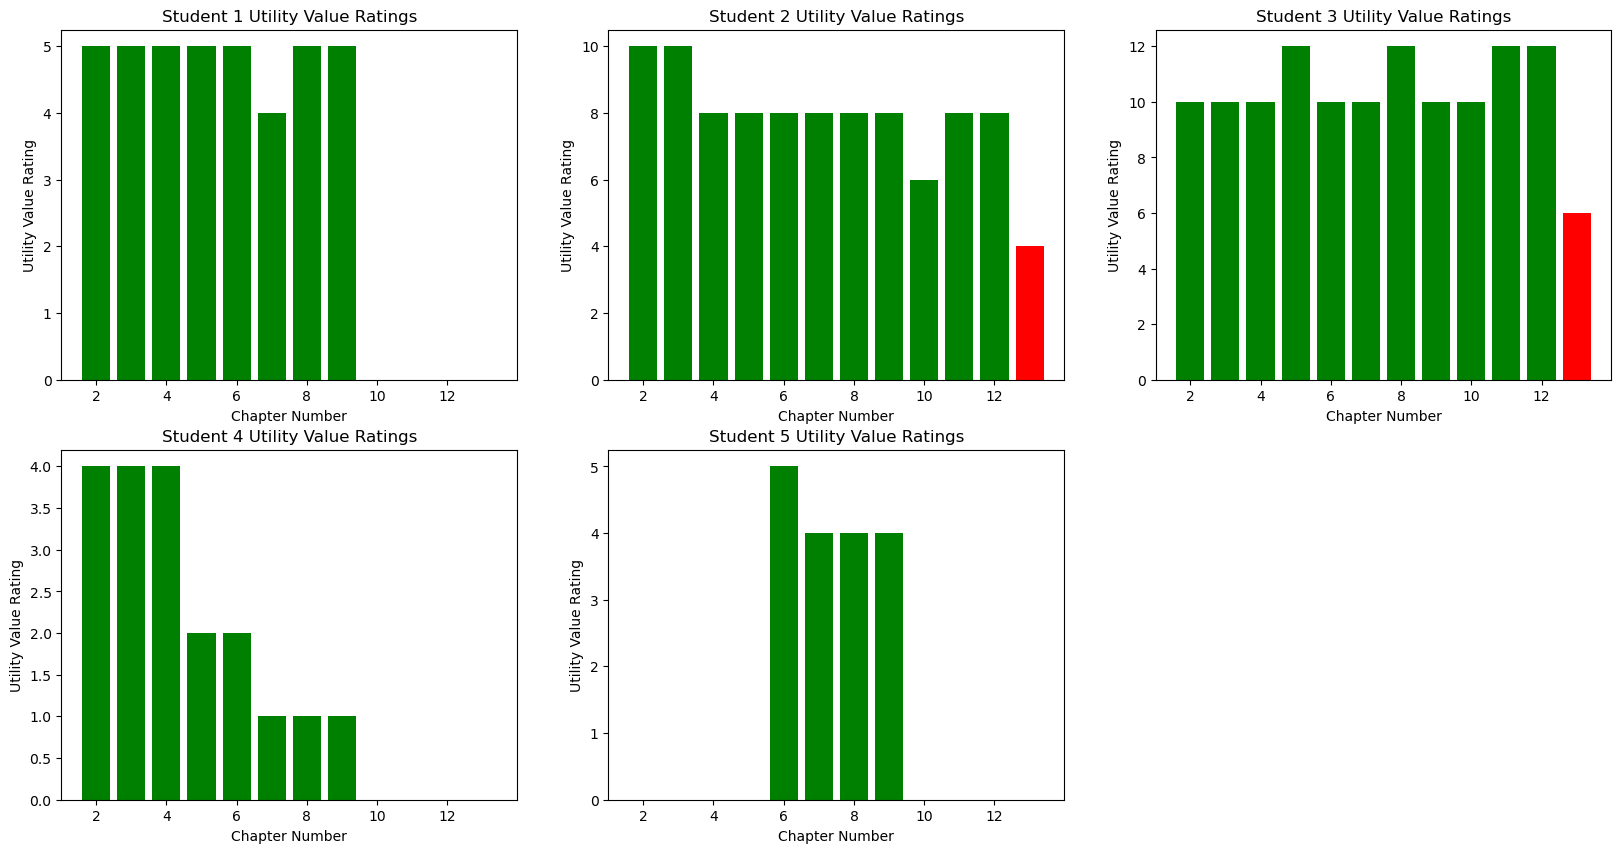

In [15]:
plt.figure(figsize = (20, 10))
for i, student in enumerate(students):
    plt.subplot(2, 3, i+1)
    utility = engagement[(engagement['student_id'] == student) & (engagement['construct'] == 'Utility Value')].groupby('chapter_number')['response'].sum()
    
    colors = ['green' if value > utility.min() else 'red' for value in utility]
    
    plt.bar(utility.index.values, utility.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Utility Value Rating')
    plt.title(f"Student {i + 1} Utility Value Ratings")
    
plt.show()

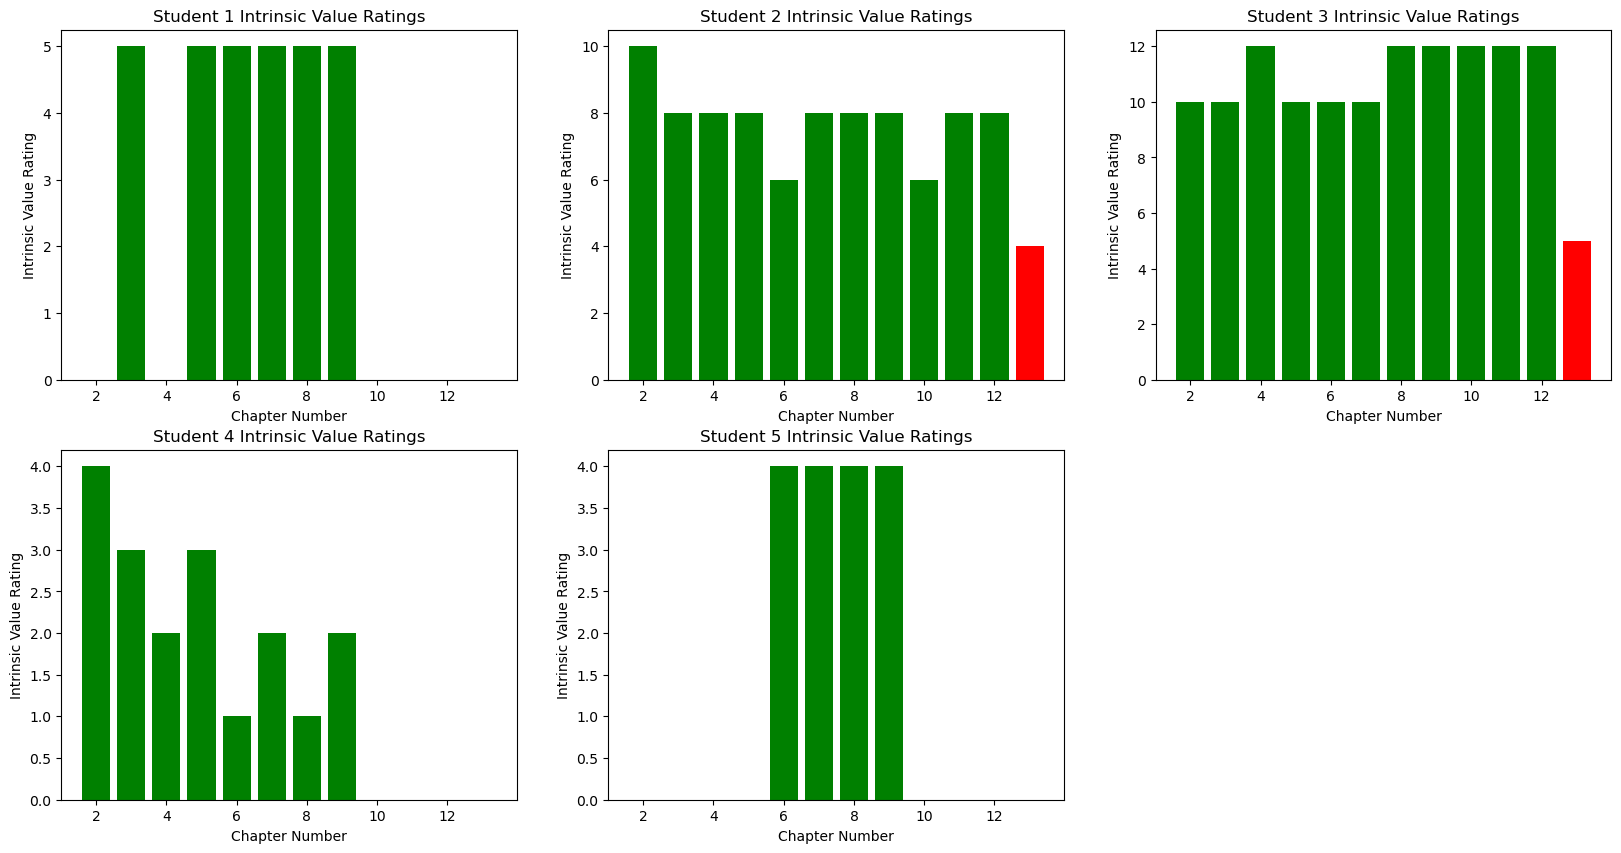

In [16]:
plt.figure(figsize = (20, 10))
for i, student in enumerate(students):
    plt.subplot(2, 3, i+1)
    intrinsic = engagement[(engagement['student_id'] == student) & (engagement['construct'] == 'Intrinsic Value')].groupby('chapter_number')['response'].sum()
    
    colors = ['green' if value > intrinsic.min() else 'red' for value in intrinsic]
    
    plt.bar(utility.index.values, intrinsic.values, color = colors)
    plt.xlabel('Chapter Number')
    plt.ylabel('Intrinsic Value Rating')
    plt.title(f"Student {i + 1} Intrinsic Value Ratings")
    
plt.show()